In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

warnings.filterwarnings("ignore")

Дата (Date)                 
Описание: Дата в формате dd/mm/yyyy.

Время (Time)               
Описание: Время в формате hh:mm:ss.

Глобальная активная мощность (Global Active Power)               
Описание: Среднеминутная активная мощность дома (в киловаттах).

Глобальная реактивная мощность (Global Reactive Power)                
Описание: Среднеминутная реактивная мощность дома (в киловаттах).

Напряжение (Voltage)               
Описание: Среднеминутное напряжение (в вольтах).
 
Глобальная интенсивность (Global Intensity)              
Описание: Среднеминутная интенсивность тока в доме (в амперах).

Энергопотребление субсчетчика 1 (Sub Metering 1)       
Описание: Потребление активной энергии субсчетчика № 1 (в ватт-часах). Соответствует кухне, включающей в себя посудомоечную машину, духовку и микроволновую печь.

Энергопотребление субсчетчика 2 (Sub Metering 2)          
Описание: Потребление активной энергии субсчетчика № 2 (в ватт-часах). Соответствует прачечной, содержащей стиральную машину, сушильную машину, холодильник и освещение.

Энергопотребление субсчетчика 3 (Sub Metering 3)                
Описание: Потребление активной энергии субсчетчика № 3 (в ватт-часах). Соответствует электрическому водонагревателю и кондиционеру.

In [5]:
data = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, na_values=['nan','?'])
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


Приведем признаки к числовым типам и столбцы Date и Time ко времени, числовой тип тут имеет только столбец Sub_metering_3

In [6]:
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time']) 

data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute

data.drop(['Date', 'Time'], axis=1, inplace=True)
data.drop(['datetime'], axis=1, inplace=True)

In [7]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour,minute
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,24
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,25
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,26
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,27
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,28
...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010,11,26,20,58
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010,11,26,20,59
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010,11,26,21,0
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010,11,26,21,1


In [8]:
data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']] = data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].astype(float)

> Посмотрим на ситуацию с пропусками

In [9]:
round(data.describe(), 3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour,minute
count,2049280.000,2049280.000,2049280.00,2049280.000,2049280.000,2049280.000,2049280.000,2075259.000,2075259.000,2075259.000,2075259.000,2075259.000
mean,1.092,0.124,240.84,4.628,1.122,1.299,6.458,2008.437,6.450,15.774,11.501,29.500
std,1.057,0.113,3.24,4.444,6.153,5.822,8.437,1.129,3.416,8.788,6.922,17.318
min,0.076,0.000,223.20,0.200,0.000,0.000,0.000,2006.000,1.000,1.000,0.000,0.000
25%,0.308,0.048,238.99,1.400,0.000,0.000,0.000,2007.000,3.000,8.000,6.000,15.000
50%,0.602,0.100,241.01,2.600,0.000,0.000,1.000,2008.000,6.000,16.000,12.000,30.000
75%,1.528,0.194,242.89,6.400,0.000,1.000,17.000,2009.000,9.000,23.000,18.000,45.000
max,11.122,1.390,254.15,48.400,88.000,80.000,31.000,2010.000,12.000,31.000,23.000,59.000


In [10]:
data.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
year                         0
month                        0
day                          0
hour                         0
minute                       0
dtype: int64

In [11]:
(data.isna().sum() / len(data)).round(4) * 100

Global_active_power      1.25
Global_reactive_power    1.25
Voltage                  1.25
Global_intensity         1.25
Sub_metering_1           1.25
Sub_metering_2           1.25
Sub_metering_3           1.25
year                     0.00
month                    0.00
day                      0.00
hour                     0.00
minute                   0.00
dtype: float64

> Пропуски почти во всех признаках одинаковы, думаю просто удалить их

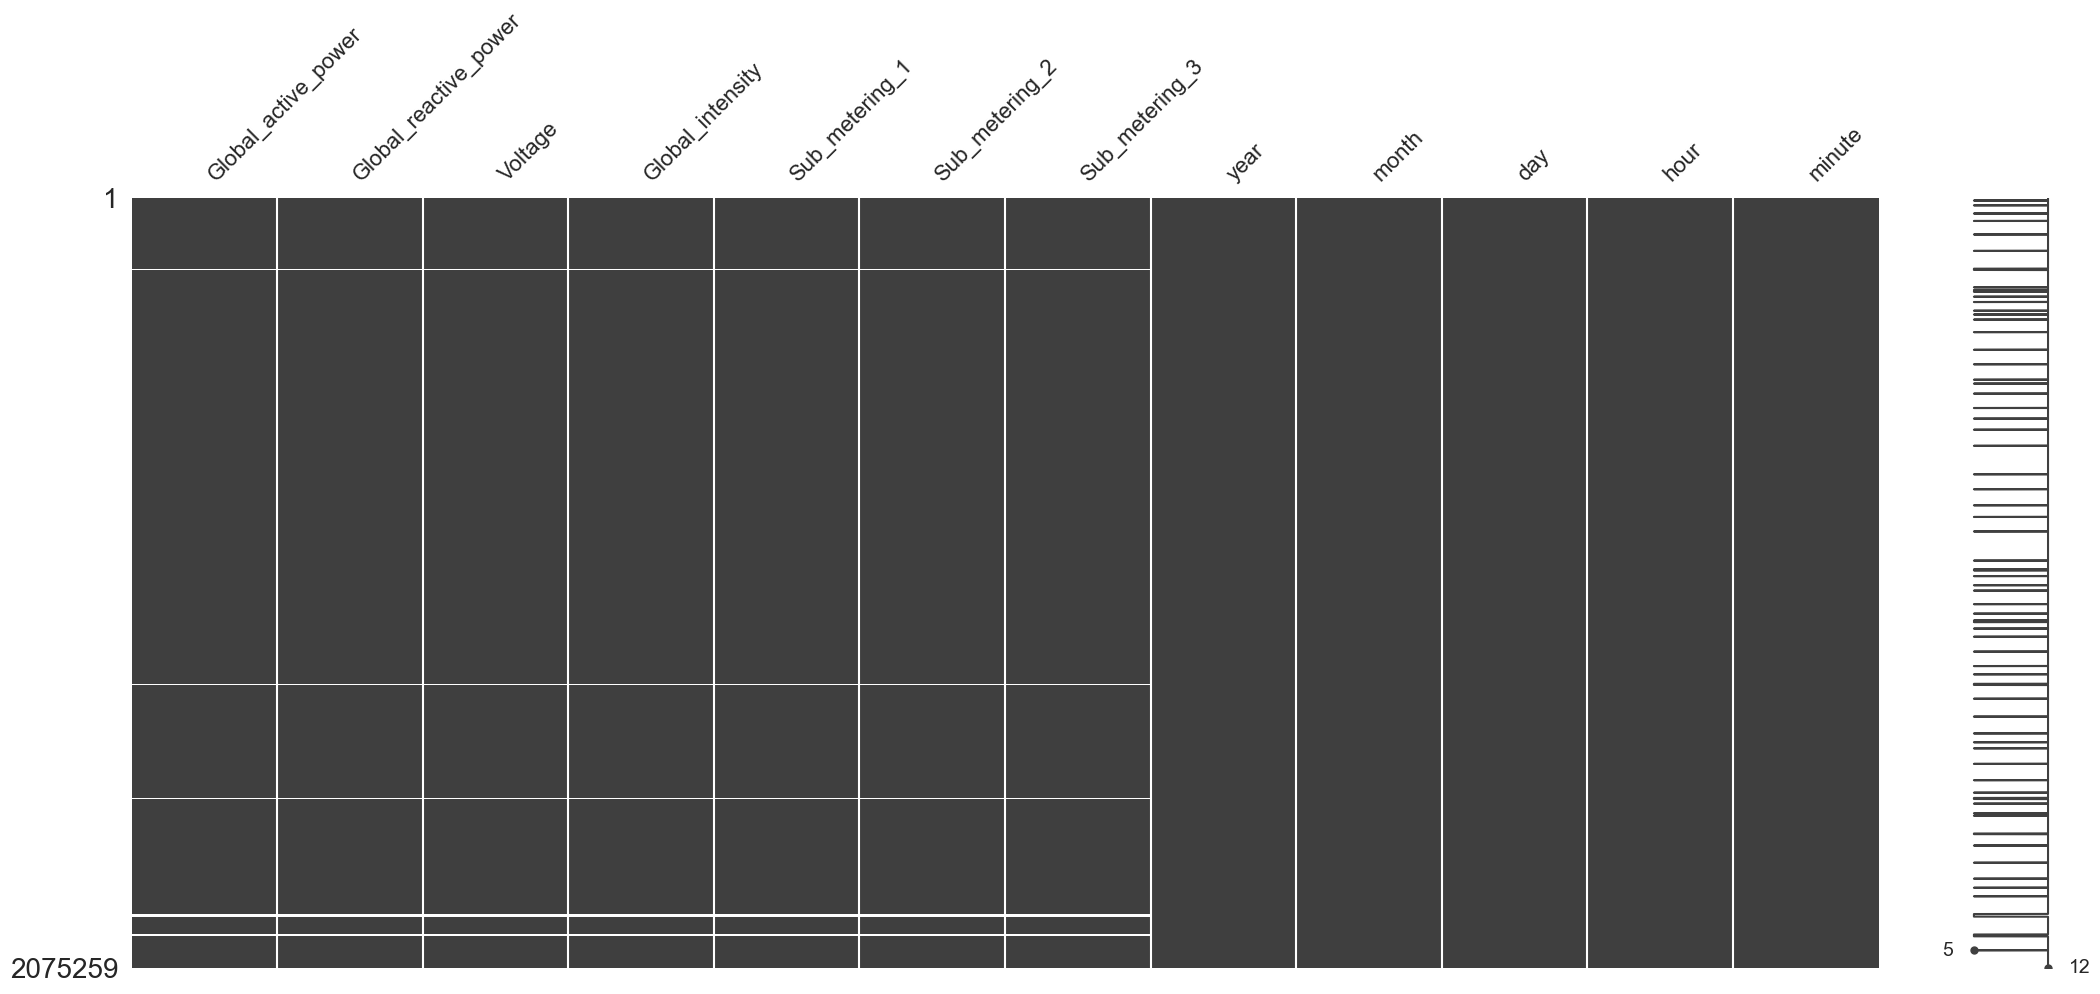

In [12]:
sns.set()
msno.matrix(data);

In [13]:
data = data.dropna()

In [14]:
data.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
month                    0
day                      0
hour                     0
minute                   0
dtype: int64

In [15]:
data_corr = data.corr()
data_corr

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour,minute
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,-0.034328,-0.032654,0.002052,0.281602,0.002422
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.047018,0.027211,0.000674,0.127892,0.000186
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,0.254623,-0.015191,0.023525,-0.176050,0.009733
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,-0.038621,-0.031417,0.001447,0.281972,0.002354
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,-0.012557,-0.007513,-0.005312,0.108491,-0.000543
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,-0.035939,-0.009763,0.003657,0.087210,-0.002127
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.062396,-0.030791,-0.000799,0.113873,-0.000419
year,-0.034328,0.047018,0.254623,-0.038621,-0.012557,-0.035939,0.062396,1.000000,-0.092194,-0.031789,-0.000785,-0.000009
month,-0.032654,0.027211,-0.015191,-0.031417,-0.007513,-0.009763,-0.030791,-0.092194,1.000000,0.018988,0.000011,0.000010
day,0.002052,0.000674,0.023525,0.001447,-0.005312,0.003657,-0.000799,-0.031789,0.018988,1.000000,0.000676,0.000018


# Модели

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = data.drop('Global_active_power', axis=1)
y = data['Global_active_power']

In [18]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Линейная регрессия


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predict = lin_reg.predict(x_test)
lin_reg_mse = mean_squared_error(y_test, predict)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, predict))
lin_reg_mae = mean_absolute_error(y_test, predict)
print(f'Средне квадратичная ошибка: {lin_reg_mse}')
print(f'Корень из среднеквадратичной ошибки: {lin_reg_rmse}')
print(f'Средне абсолютная ошибка: {lin_reg_mae}')

Средне квадратичная ошибка: 0.0016276670962284225
Корень из среднеквадратичной ошибки: 0.0403443564359183
Средне абсолютная ошибка: 0.025780934072099283


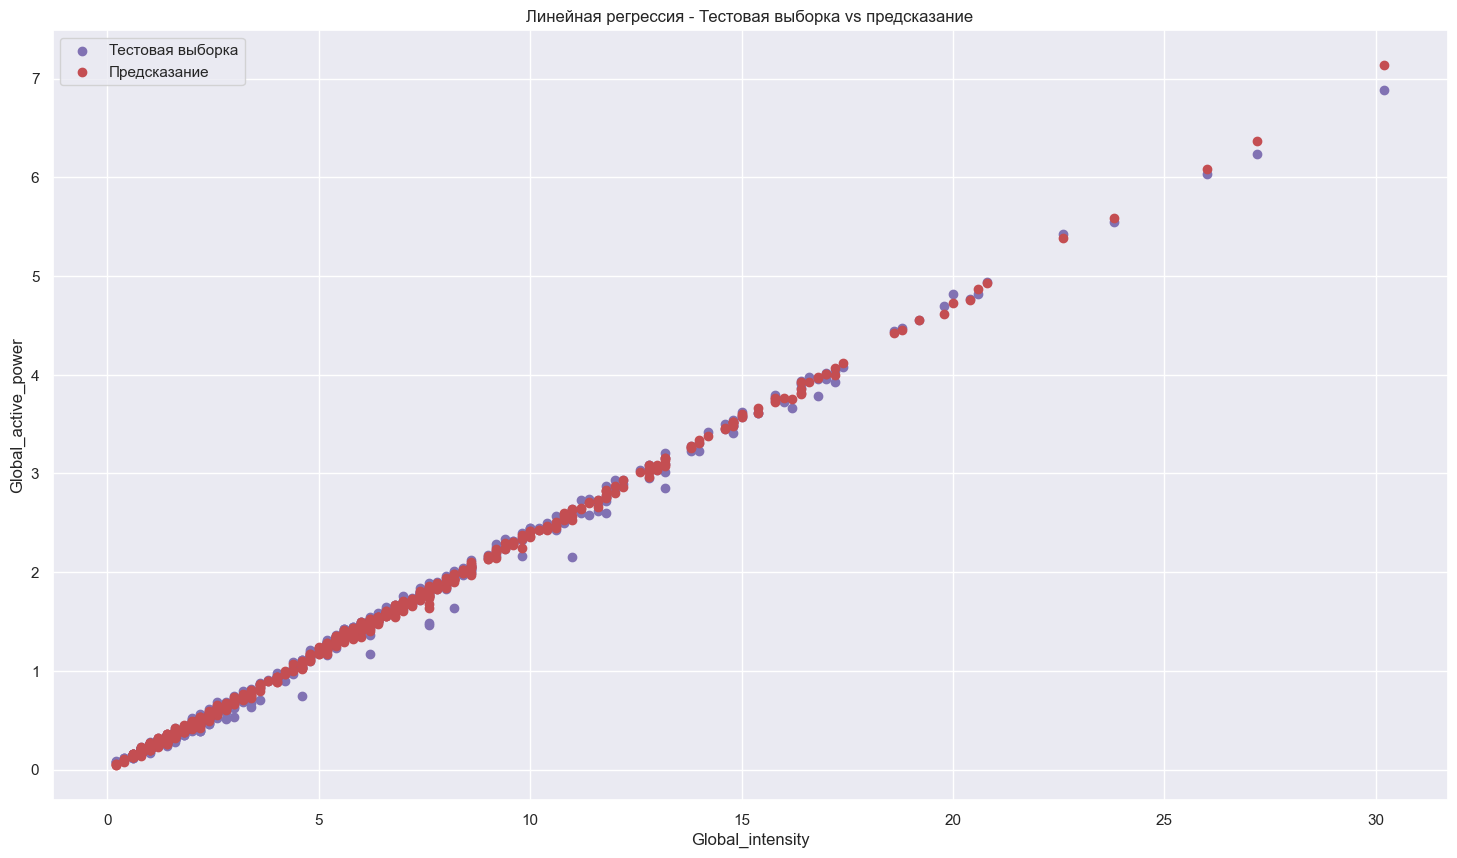

In [23]:
plt.figure(figsize=(18, 10))

plt.scatter(x_test['Global_intensity'][:1000], y_test[:1000], color='m', label = 'Тестовая выборка')

plt.scatter(x_test['Global_intensity'][:1000], predict[:1000], color='r', label= 'Предсказание')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('Линейная регрессия - Тестовая выборка vs предсказание')
plt.legend()
plt.show()

In [21]:
y_train_pred = lin_reg.predict(X_train)
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)

print(mae)
print(mse)

0.025824641971027292
0.0016461011400356548


>Когда значение MSE на тестовой выборке близко к значению MSE на обучающей выборке, это может указывать на то, что модель хорошо обобщает данные и не переобучена на тренировочных данных.

## Решающие деревья

In [24]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
predict = decision_tree.predict(x_test)
dec_three_mse = mean_squared_error(y_test, predict)
dec_three_rmse = np.sqrt(mean_squared_error(y_test, predict))
dec_three_mae = mean_absolute_error(y_test, predict)
print(f'Средне квадратичная ошибка: {dec_three_mse}')
print(f'Корень из среднеквадратичной ошибки: {dec_three_rmse}')
print(f'Средне абсолютная ошибка: {dec_three_mae}')

Средне квадратичная ошибка: 0.001245373516552155
Корень из среднеквадратичной ошибки: 0.035289850050009494
Средне абсолютная ошибка: 0.014791809806371023


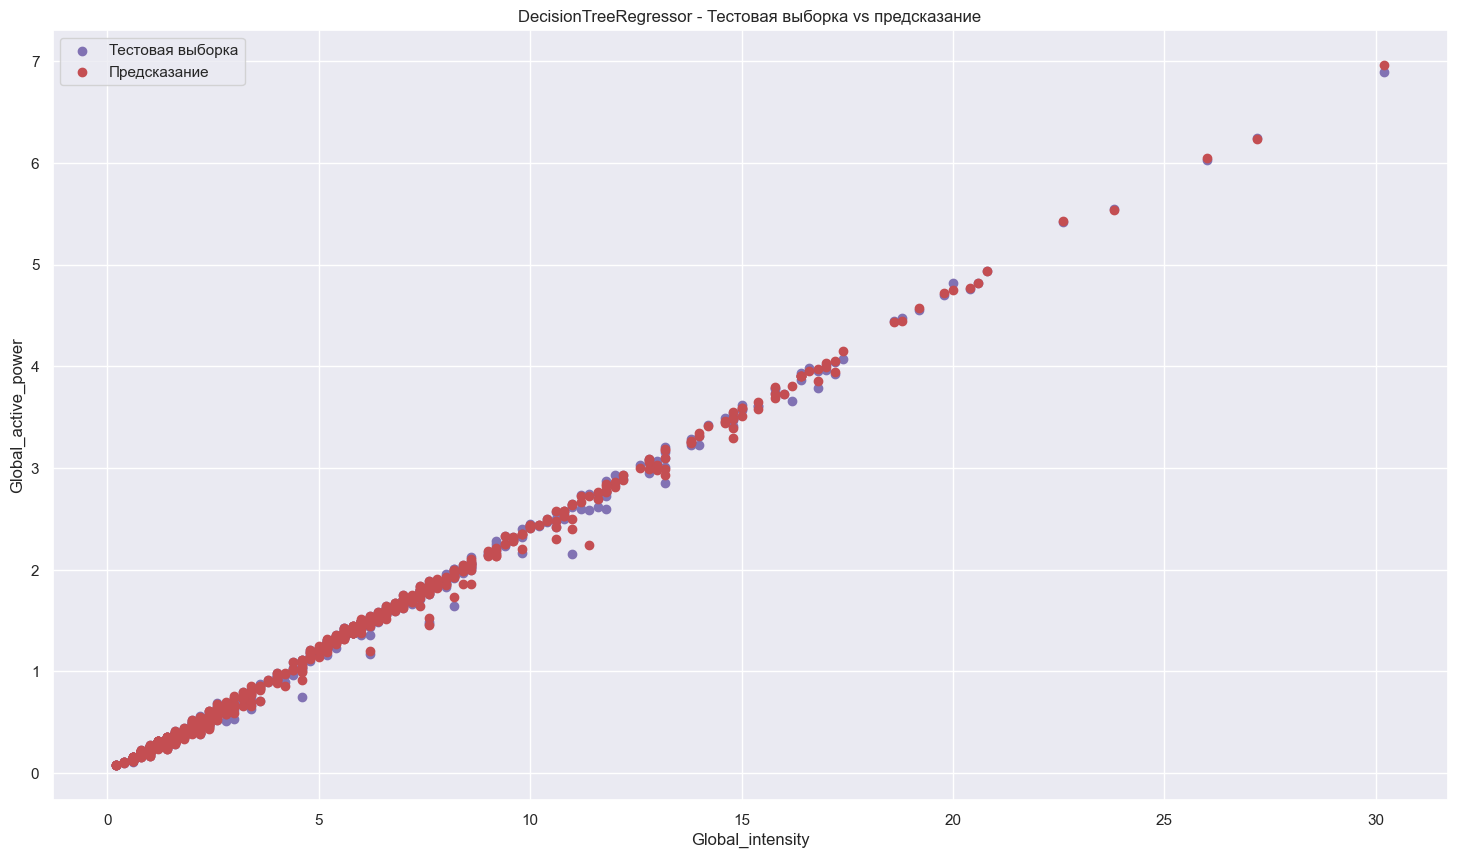

In [25]:
plt.figure(figsize=(18, 10))

plt.scatter(x_test['Global_intensity'][:1000], y_test[:1000], color='m', label = 'Тестовая выборка')

plt.scatter(x_test['Global_intensity'][:1000], predict[:1000], color='r', label= 'Предсказание')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('DecisionTreeRegressor - Тестовая выборка vs предсказание')
plt.legend()
plt.show()

### Случайный лес

In [26]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
predict = random_forest_reg.predict(x_test)
Random_forest_mse = mean_squared_error(y_test, predict)
Random_forest_rmse = np.sqrt(mean_squared_error(y_test, predict))
Random_forest_mae = mean_absolute_error(y_test, predict)
print(f'Средне квадратичная ошибка: {Random_forest_mse}')
print(f'Корень из среднеквадратичной ошибки: {Random_forest_rmse}')
print(f'Средне абсолютная ошибка: {Random_forest_mae}')

Средне квадратичная ошибка: 0.0006437447355480953
Корень из среднеквадратичной ошибки: 0.025372125168146544
Средне абсолютная ошибка: 0.011475001821778066


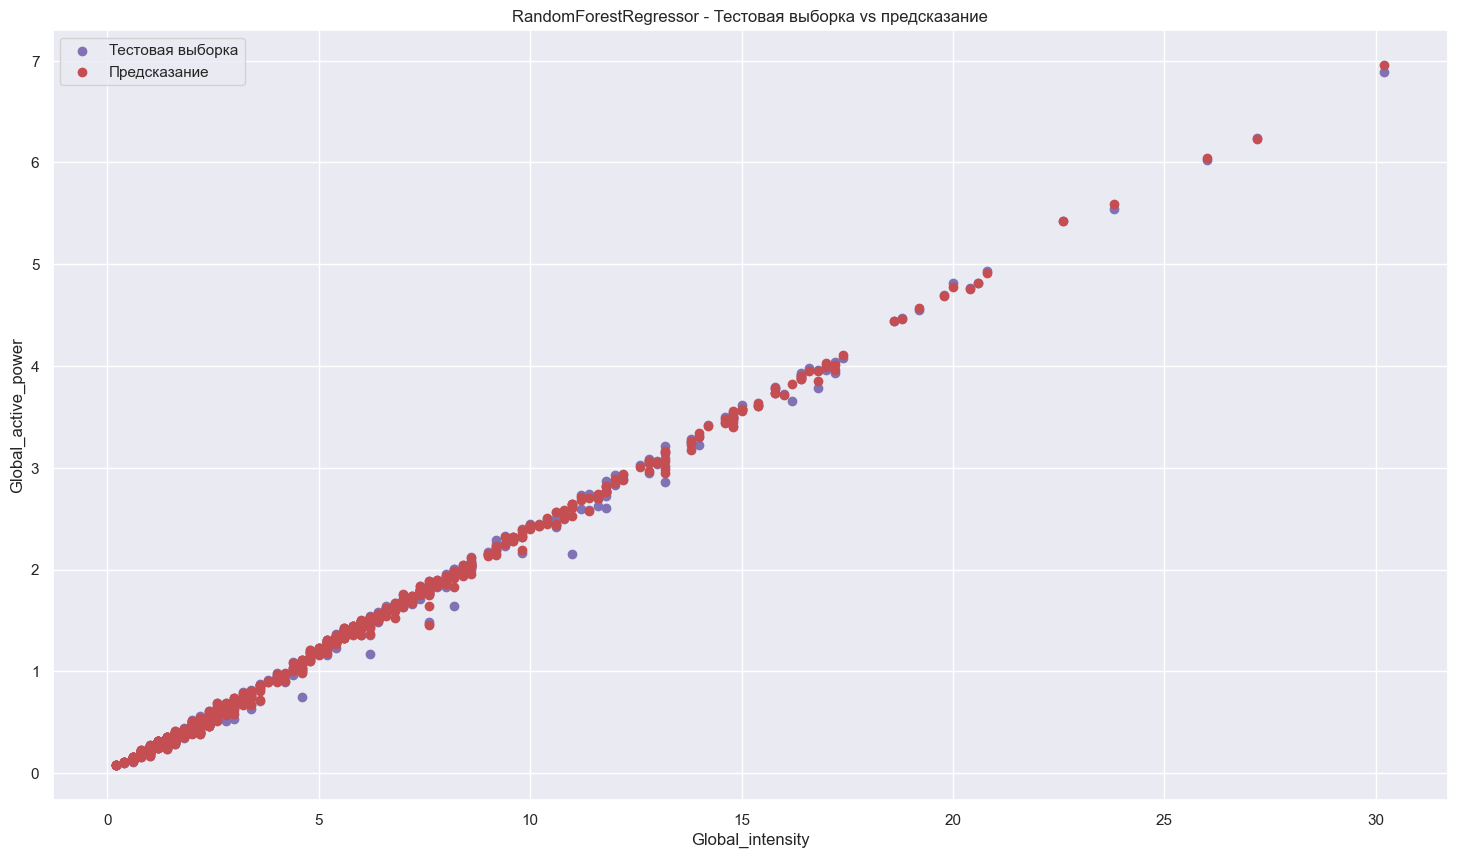

In [27]:
plt.figure(figsize=(18, 10))

plt.scatter(x_test['Global_intensity'][:1000], y_test[:1000], color='m', label = 'Тестовая выборка')

plt.scatter(x_test['Global_intensity'][:1000], predict[:1000], color='r', label= 'Предсказание')

plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('RandomForestRegressor - Тестовая выборка vs предсказание')
plt.legend()
plt.show()

### Бустинговые модели

In [28]:
from xgboost import XGBRegressor
xgboost_reg = XGBRegressor()
xgboost_reg.fit(X_train, y_train)
predict = xgboost_reg.predict(x_test)
xgb_mse = mean_squared_error(y_test, predict)
xgb_rmse = np.sqrt(mean_squared_error(y_test, predict))
xgb_mae = mean_absolute_error(y_test, predict)
print(f'Средне квадратичная ошибка: {xgb_mse}')
print(f'Корень из среднеквадратичной ошибки: {xgb_rmse}')
print(f'Средне абсолютная ошибка: {xgb_mae}')

Средне квадратичная ошибка: 0.0007916769742508412
Корень из среднеквадратичной ошибки: 0.02813675486353821
Средне абсолютная ошибка: 0.016800562373095622


In [29]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
grad_boost_reg = GradientBoostingRegressor()
grad_boost_reg.fit(X_train, y_train)
predict = grad_boost_reg.predict(x_test)
grad_mse = mean_squared_error(y_test, predict)
print(f'Средне квадратичная ошибка grad_boost: {grad_mse}')

Средне квадратичная ошибка grad_boost: 0.0011465619151963336


In [30]:
ada_boost_reg = AdaBoostRegressor()
ada_boost_reg.fit(X_train, y_train)
predict = ada_boost_reg.predict(x_test)
ada_mse = mean_squared_error(y_test, predict)
print(f'Средне квадратичная ошибка ada_boost: {ada_mse}')

Средне квадратичная ошибка ada_boost: 0.012247573695516713


In [31]:
bagging_Regress = BaggingRegressor()
bagging_Regress.fit(X_train, y_train)
predict = bagging_Regress.predict(x_test)
bagging_mse = mean_squared_error(y_test, predict)
print(f'Средне квадратичная ошибка Bagging_Regress: {bagging_mse}')

Средне квадратичная ошибка Bagging_Regress: 0.0007114417705080158


In [33]:
mse = [lin_reg_mse, dec_three_mse, Random_forest_mse, xgb_mse, grad_mse, ada_mse, bagging_mse] 
models = ['lenar', 'decision_tree', 'random_forest', 'xgb', 'grad_boost', 'ada_mse', 'bagging_mse']

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'lenar'),
  Text(1, 0, 'decision_tree'),
  Text(2, 0, 'random_forest'),
  Text(3, 0, 'xgb'),
  Text(4, 0, 'grad_boost'),
  Text(5, 0, 'ada_mse'),
  Text(6, 0, 'bagging_mse')])

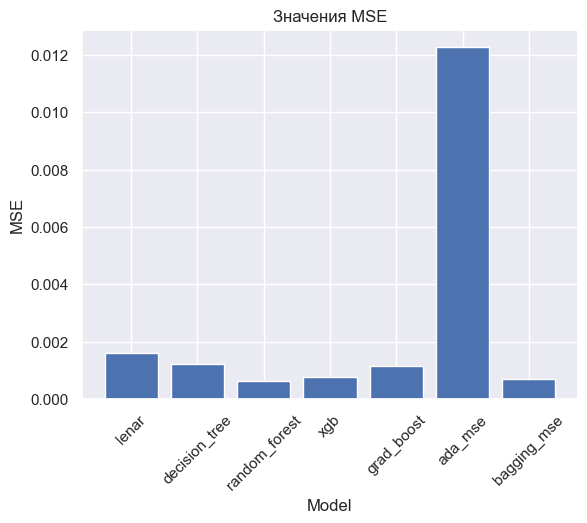

In [35]:
plt.bar(models, mse)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Значения MSE')
plt.xticks(rotation=45)

> По полученным результатам делаем вывод, что решающие деревья лучше всего обощают наши данные.

In [ ]:
from sklearn.model_selection import GridSearchCV
random_forest_reg = RandomForestRegressor(n_jobs=-1)
param_grid = {
    'n_estimators': range(100, 501, 10),
    'max_depth': range(2, 11),
    'min_samples_leaf': range(1, 5),
    'criterion': ['squared_error']
}
grid_search = GridSearchCV(random_forest_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_random_forest_reg = grid_search.best_estimator_

predict = best_random_forest_reg.predict(X_test)
Random_forest_mse = mean_squared_error(y_test, predict)

print(f'Лучшие параметры:{best_params}')
print(f'Средне квадратичная ошибка: {Random_forest_mse}')